In [1]:
import numpy
import pandas
import xray

In [2]:
infile = '/Users/damienirving/Downloads/Data/pwi_va_ERAInterim_500hPa_030day-runmean_native.nc'
dset = xray.open_dataset(infile)
dset

<xray.Dataset>
Dimensions:  (time: 13120)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-16T06:00:00 1979-01-17T06:00:00 ...
Data variables:
    pwi      (time) float64 5.629 5.898 5.621 5.103 4.677 4.509 4.329 4.07 ...
Attributes:
    Conventions: CF-1.0
    CDO: Climate Data Operators version 1.5.3 (http://code.zmaw.de/projects/cdo)
    nco_openmp_thread_number: 1
    CDI: Climate Data Interface version 1.5.3 (http://code.zmaw.de/projects/cdi)
    history: Tue Mar 31 12:13:15 2015: /usr/local/uvcdat/1.3.0/bin/cdat /home/STUDENT/dbirving/climate-analysis/data_processing/calc_climate_index.py PWI /mnt/meteo0/data/simmonds/dbirving/ERAInterim/data/zw/envva_w19_ERAInterim_500hPa_030day-runmean_native.nc envva /mnt/meteo0/data/simmonds/dbirving/ERAInterim/data/indexes/pwi_va_ERAInterim_500hPa_030day-runmean_native.nc (Git hash: bfd3ec8) [format=NETCDF3_CLASSIC].  
Tue Mar 31 11:53:10 2015: ncatted -O -a axis,time,c,c,T /mnt/meteo0/data/simmonds/dbir...

In [4]:
seasonal_dset = dset.resample('Q-FEB', dim='time', how='mean', label='right')
seasonal_dset

<xray.Dataset>
Dimensions:  (time: 145)
Coordinates:
  * time     (time) datetime64[ns] 1979-02-28 1979-05-31 1979-08-31 ...
Data variables:
    pwi      (time) float64 4.372 6.677 7.076 5.909 6.81 8.707 7.343 5.075 ...

In [6]:
djf_indexes = pandas.to_datetime(seasonal_dset['time'].values).month == 2
pwi_djf = seasonal_dset['pwi'].loc[djf_indexes].to_series()

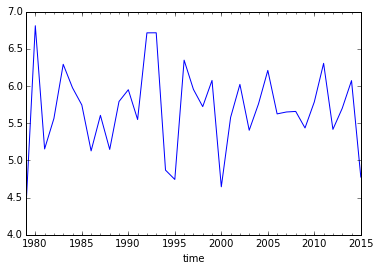

In [9]:
%matplotlib inline
pwi_djf.plot()